<a href="https://colab.research.google.com/github/jaswanthv99/Hate-Speech/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["flength","fwidth","fsize","fconc","fconc1","fasym","fm3long","fm3trans","falpha","fdist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()


flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

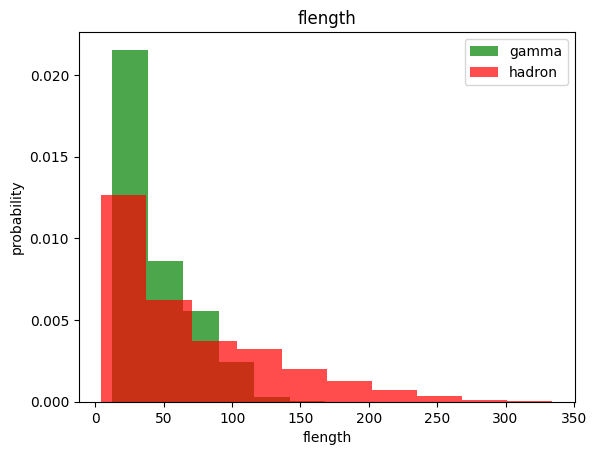

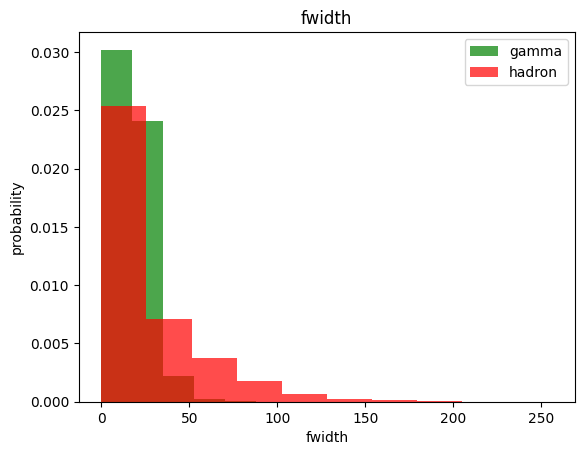

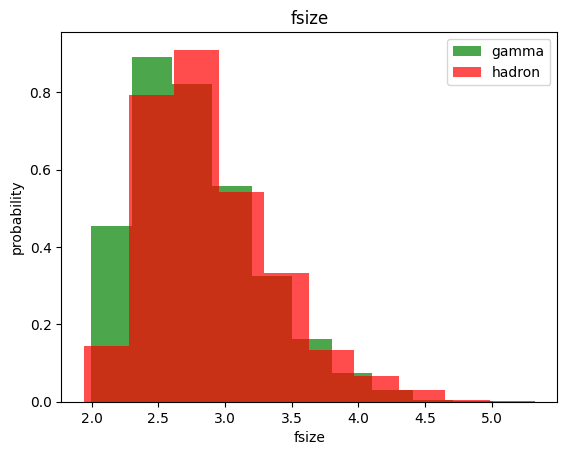

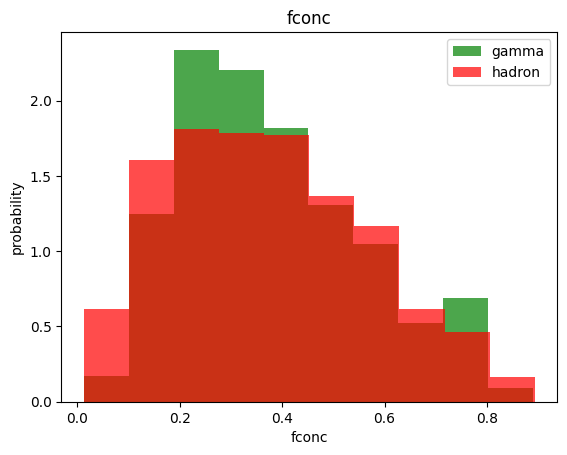

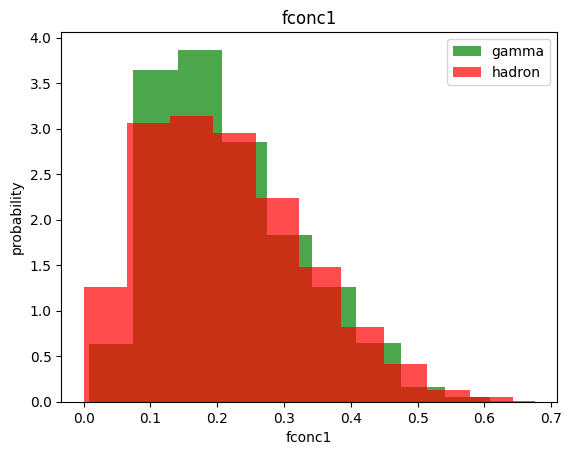

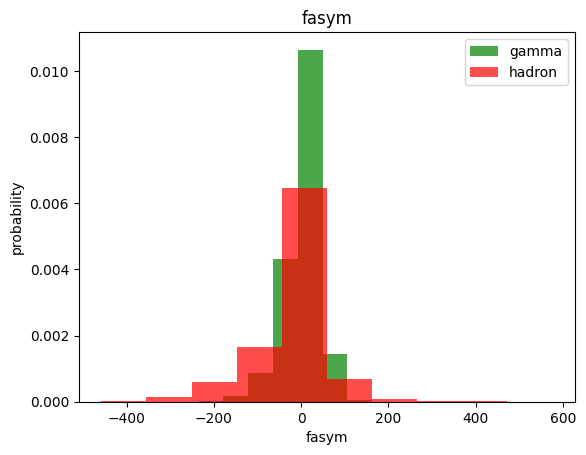

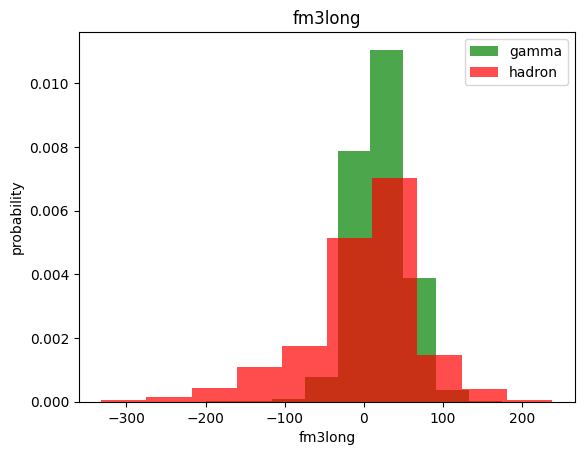

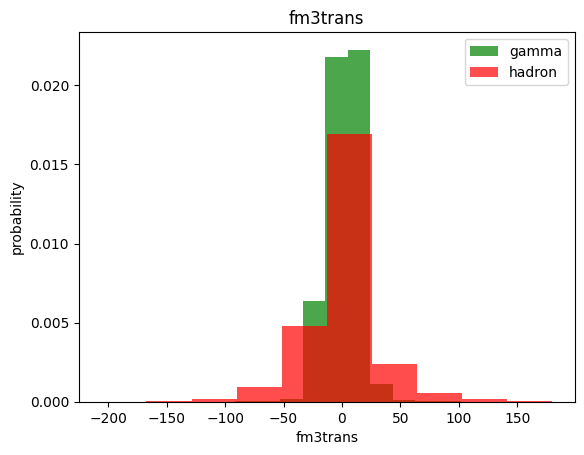

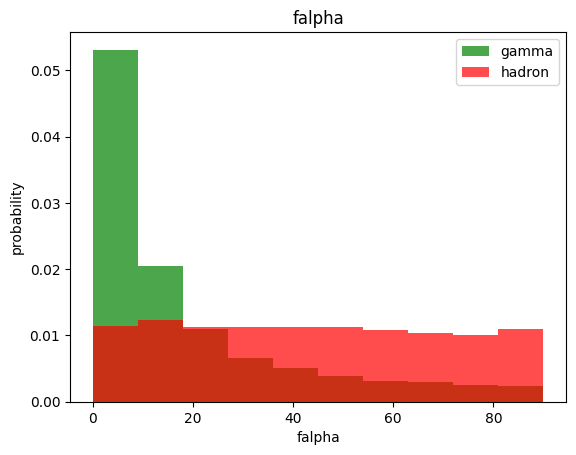

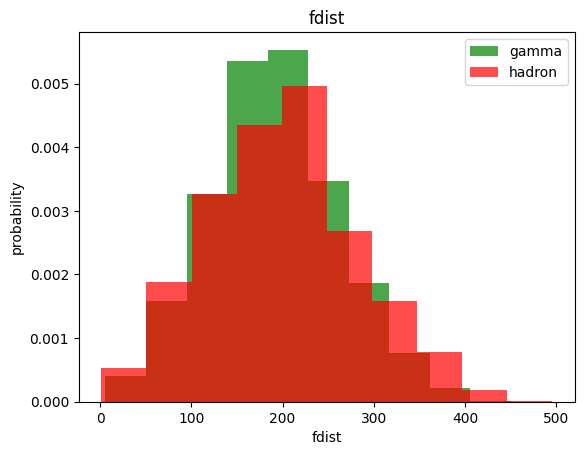

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='green', label='gamma', alpha=0.7, density=True )
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True )
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, validation, test datasets

In [ ]:
train, valid, test= np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data=np.hstack((x, np.reshape(y, (-1,1))))

  return data,x,y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1270
           1       0.87      0.85      0.86      2534

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [ ]:
y_pred=nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.51      1270
           1       0.75      0.89      0.81      2534

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1270
           1       0.86      0.81      0.83      2534

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

In [ ]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1270
           1       0.90      0.89      0.89      2534

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(np.array(history.history['loss']), label='loss')
  ax1.plot(np.array(history.history['val_loss']), label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(np.array(history.history['accuracy']), label='accuracy')
  ax2.plot(np.array(history.history['val_accuracy']), label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
   ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history=nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

In [ ]:
def plot_accuracy(history):
       plt.plot(history.history['accuracy'], label='accuracy')
       plt.plot(history.history['val_accuracy'], label='val_accuracy')
       plt.xlabel('Epoch')
       plt.ylabel('Accuracy')
       plt.legend()
       plt.grid(True)
       plt.show()

Training with 16 nodes, dropout 0, lr 0.05, batch size 32


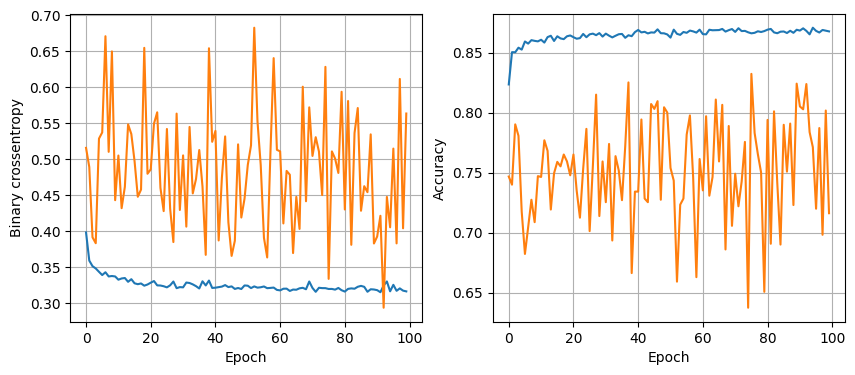

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3705
Training with 16 nodes, dropout 0, lr 0.05, batch size 64


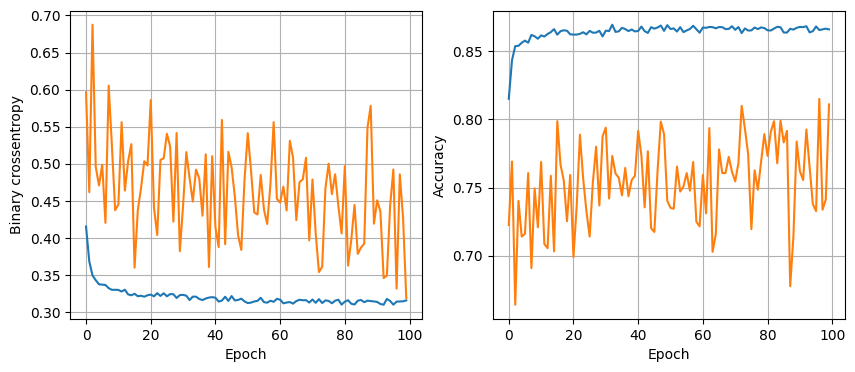

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3696
Training with 16 nodes, dropout 0, lr 0.05, batch size 128


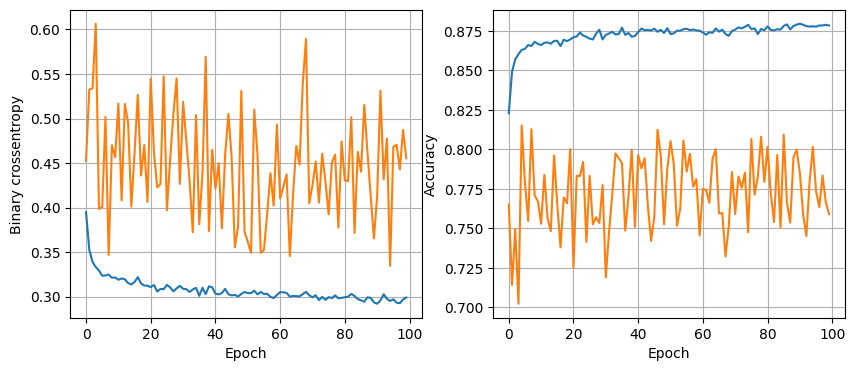

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8461 - loss: 0.3430
Training with 16 nodes, dropout 0, lr 0.005, batch size 32


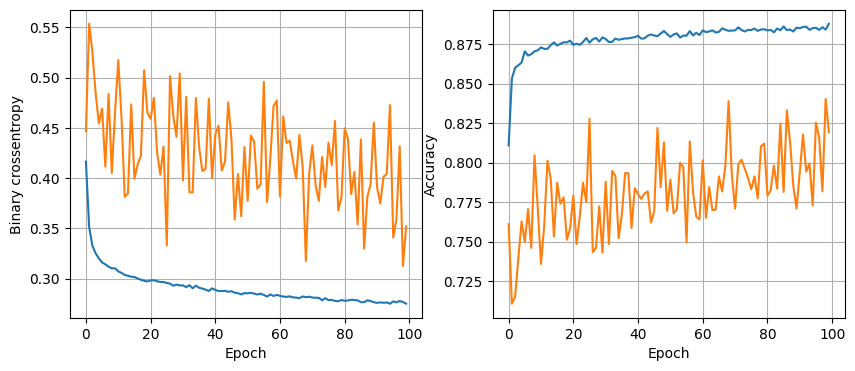

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8548 - loss: 0.3432
Training with 16 nodes, dropout 0, lr 0.005, batch size 64


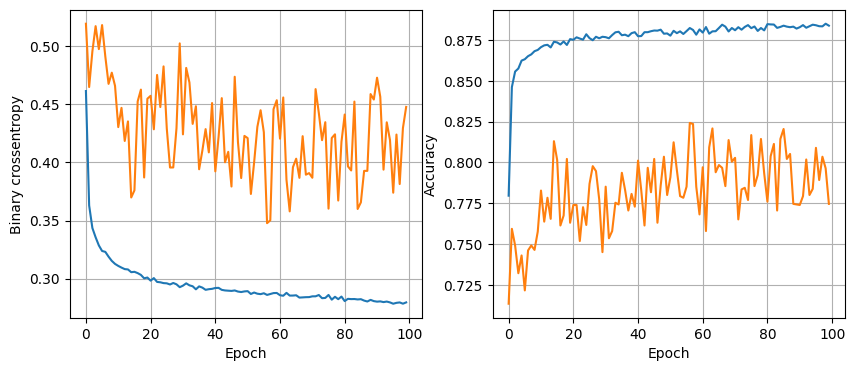

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3380
Training with 16 nodes, dropout 0, lr 0.005, batch size 128


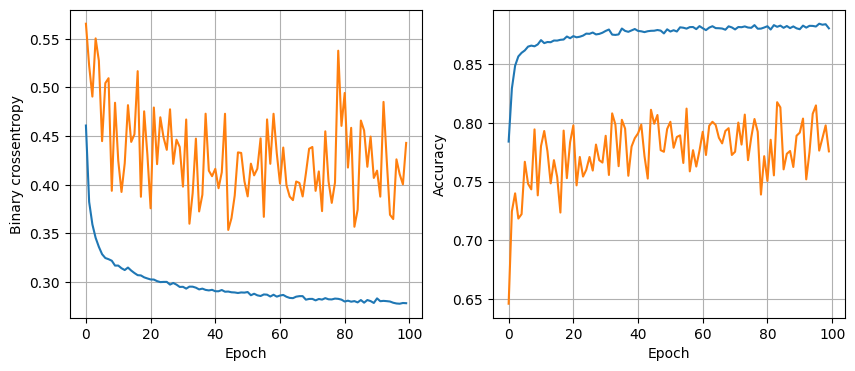

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8588 - loss: 0.3397
Training with 16 nodes, dropout 0, lr 0.0005, batch size 32


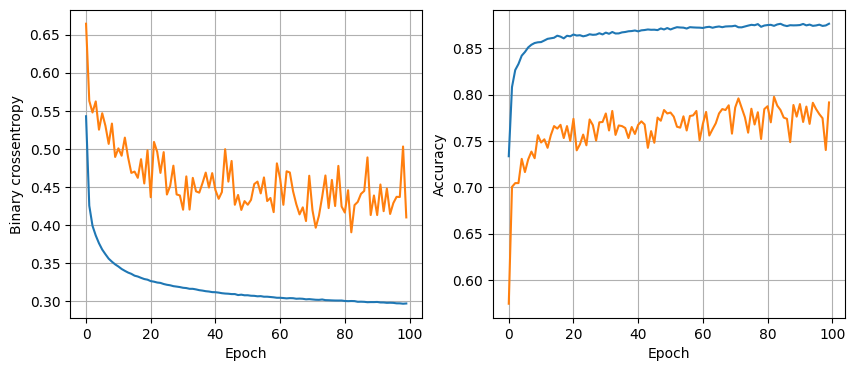

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8510 - loss: 0.3478
Training with 16 nodes, dropout 0, lr 0.0005, batch size 64


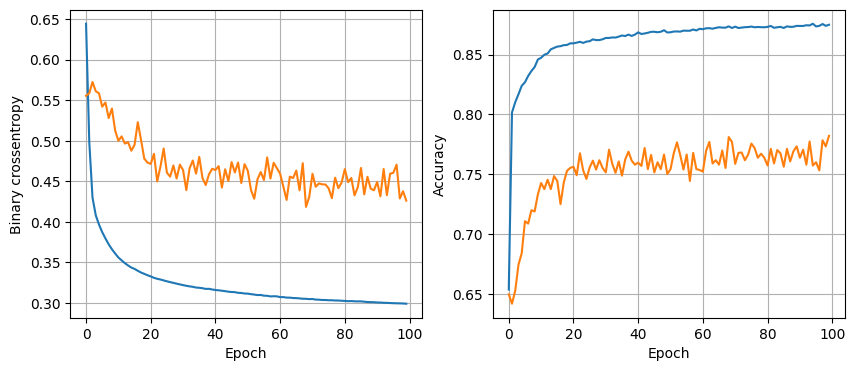

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3487
Training with 16 nodes, dropout 0, lr 0.0005, batch size 128


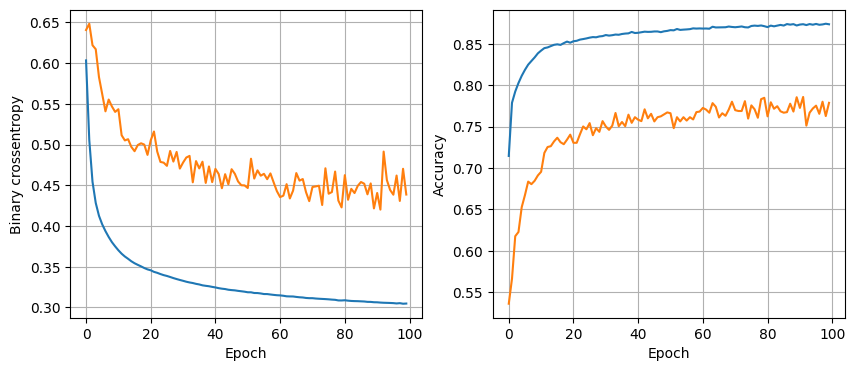

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3435
Training with 16 nodes, dropout 0.2, lr 0.05, batch size 32


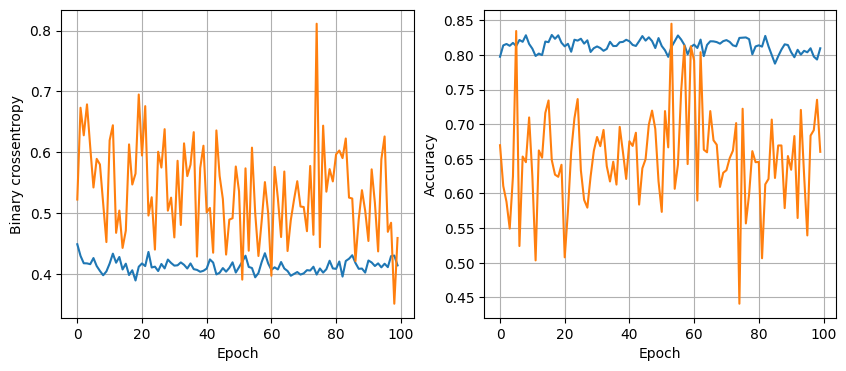

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.4033
Training with 16 nodes, dropout 0.2, lr 0.05, batch size 64


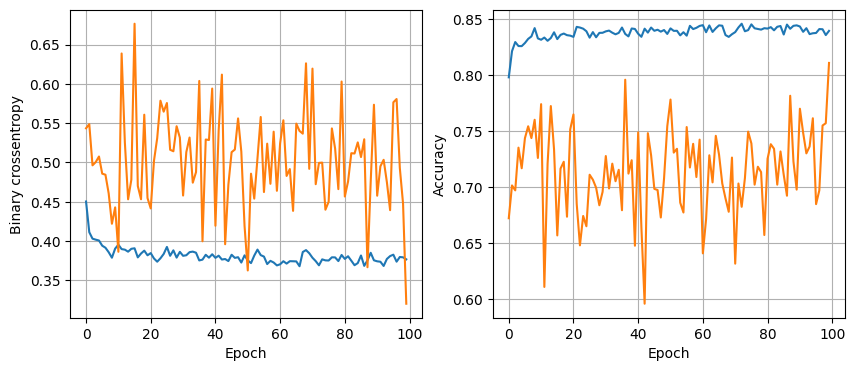

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.4352
Training with 16 nodes, dropout 0.2, lr 0.05, batch size 128


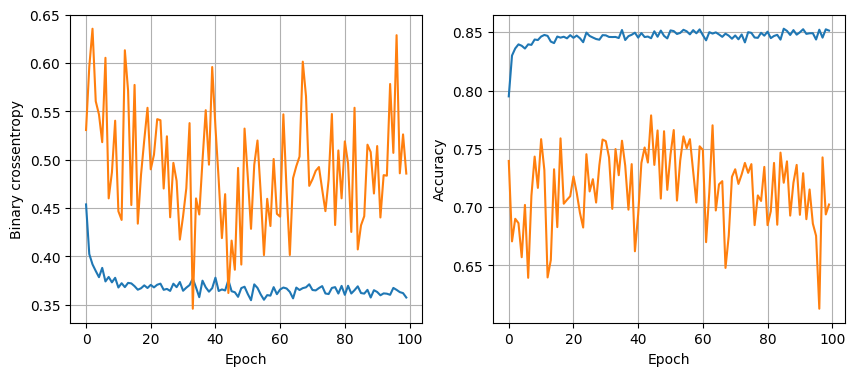

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3581
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 32


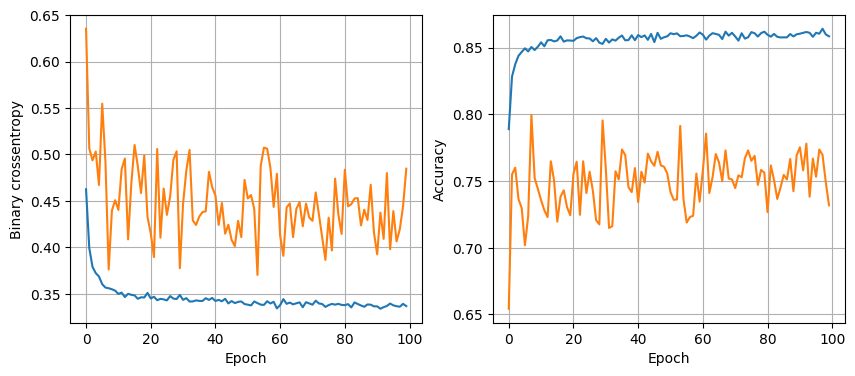

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3477
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 64


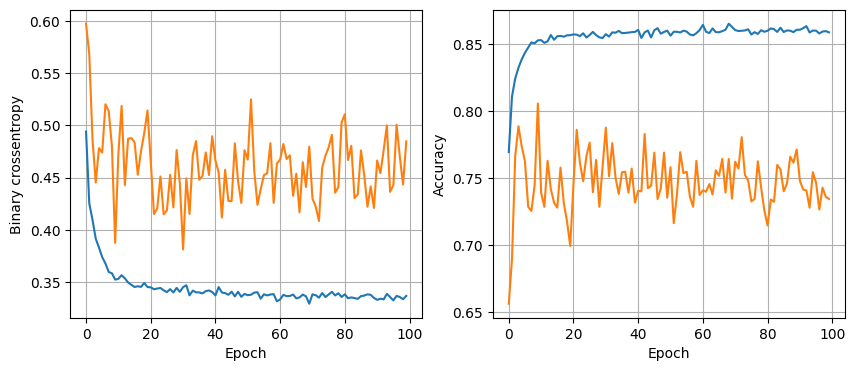

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3426
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 128


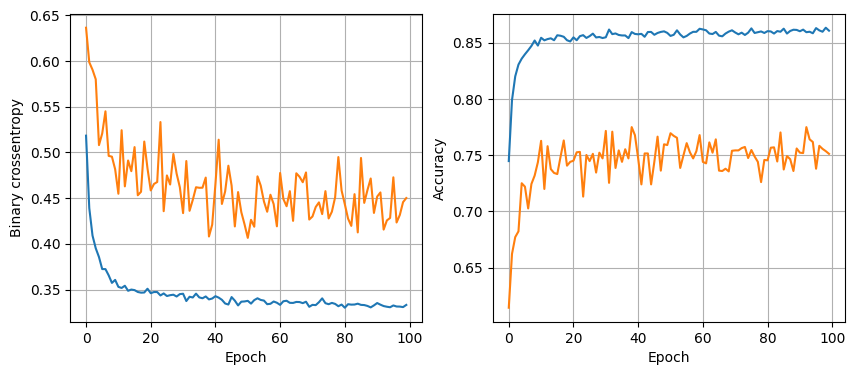

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3469
Training with 16 nodes, dropout 0.2, lr 0.0005, batch size 32


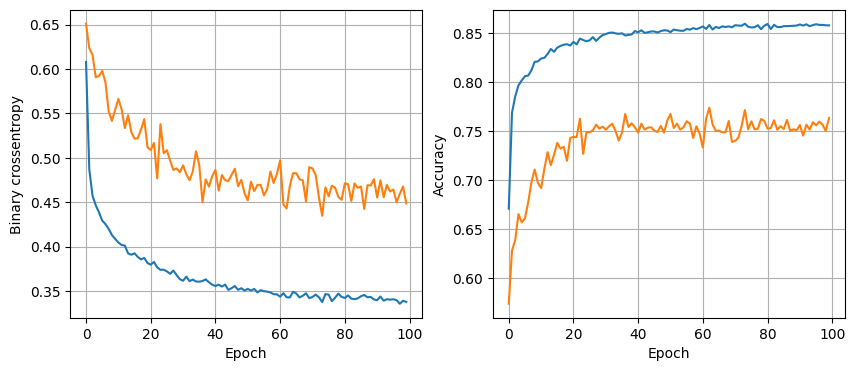

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3481
Training with 16 nodes, dropout 0.2, lr 0.0005, batch size 64


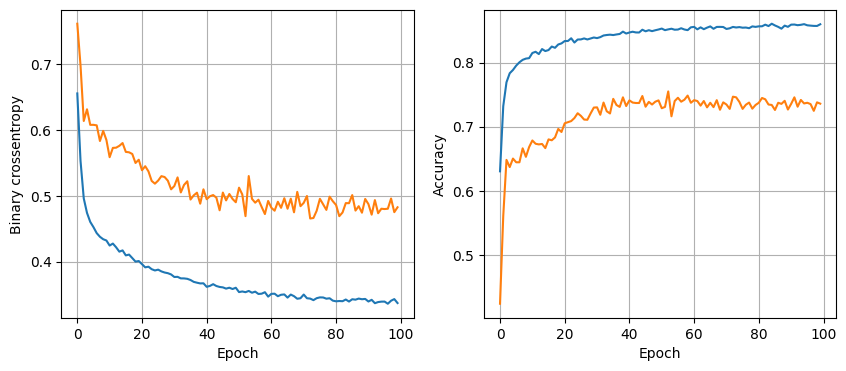

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3424
Training with 16 nodes, dropout 0.2, lr 0.0005, batch size 128


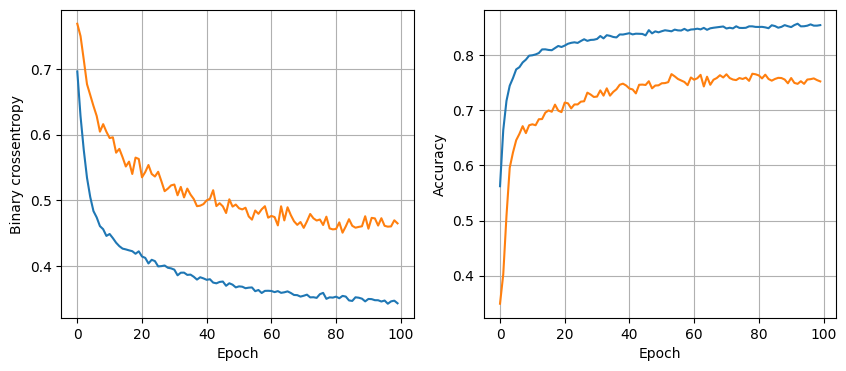

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.3492
Training with 16 nodes, dropout 0.5, lr 0.05, batch size 32


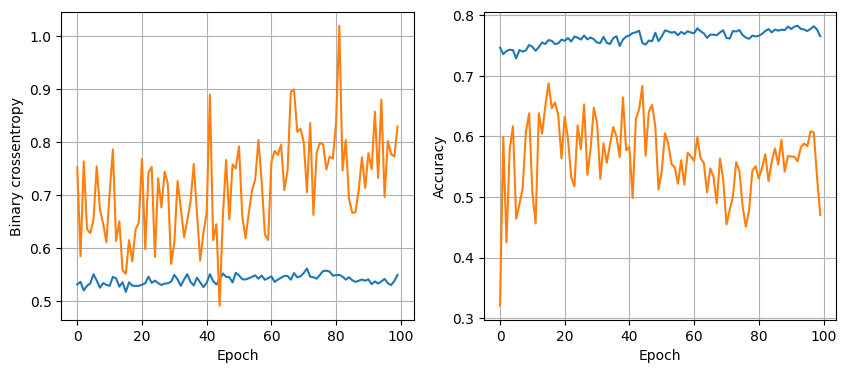

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7917 - loss: 0.4940
Training with 16 nodes, dropout 0.5, lr 0.05, batch size 64


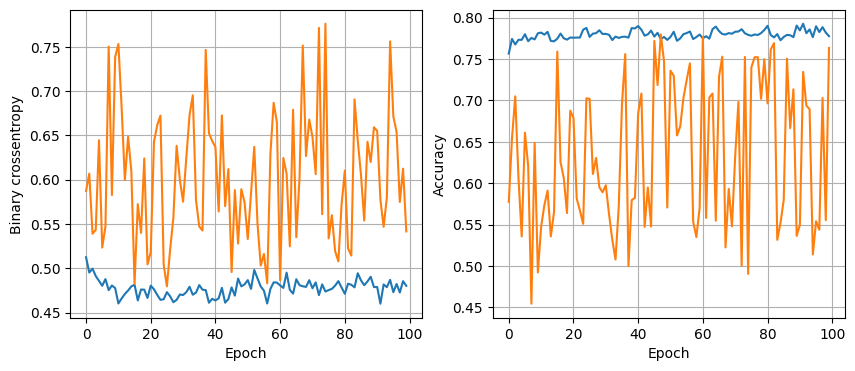

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4598
Training with 16 nodes, dropout 0.5, lr 0.05, batch size 128


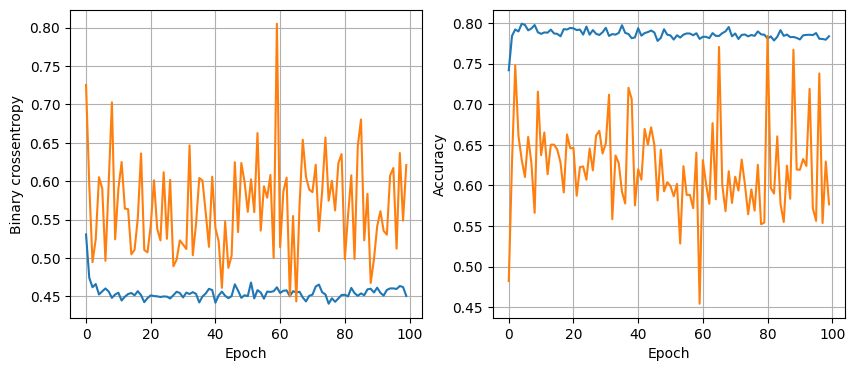

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.4051
Training with 16 nodes, dropout 0.5, lr 0.005, batch size 32


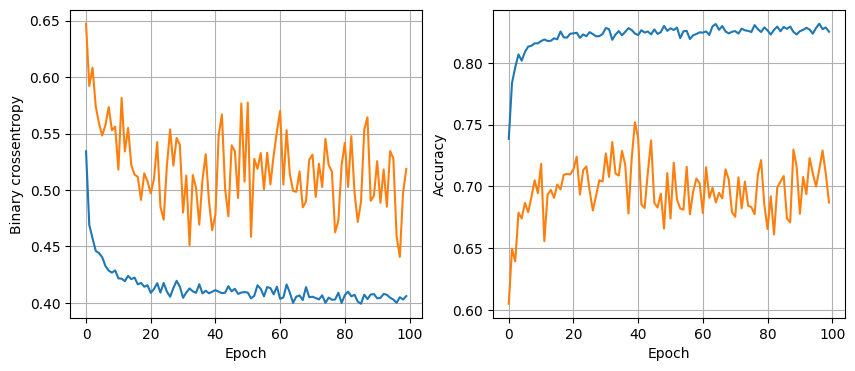

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3787
Training with 16 nodes, dropout 0.5, lr 0.005, batch size 64


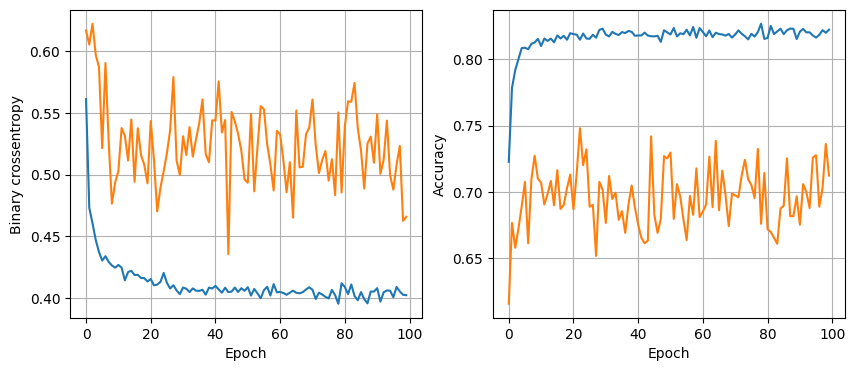

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3734
Training with 16 nodes, dropout 0.5, lr 0.005, batch size 128


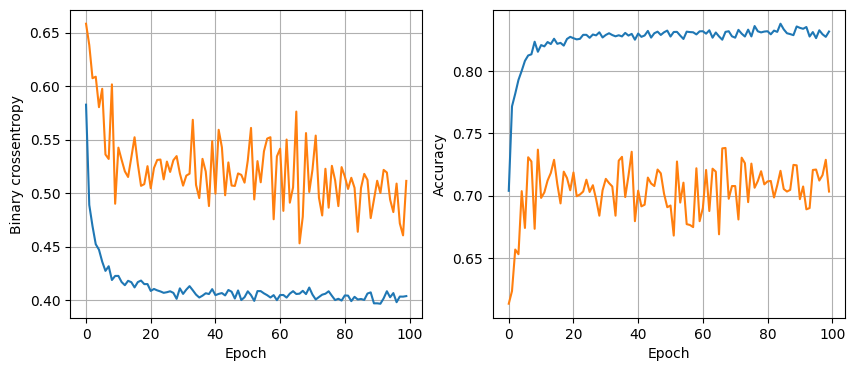

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.3626
Training with 16 nodes, dropout 0.5, lr 0.0005, batch size 32


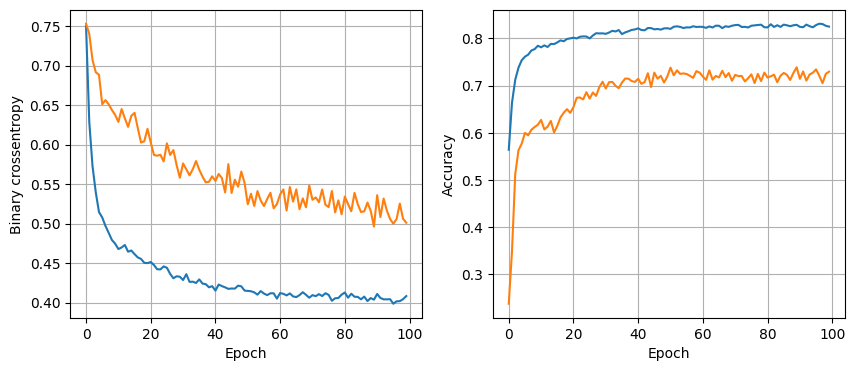

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3673
Training with 16 nodes, dropout 0.5, lr 0.0005, batch size 64


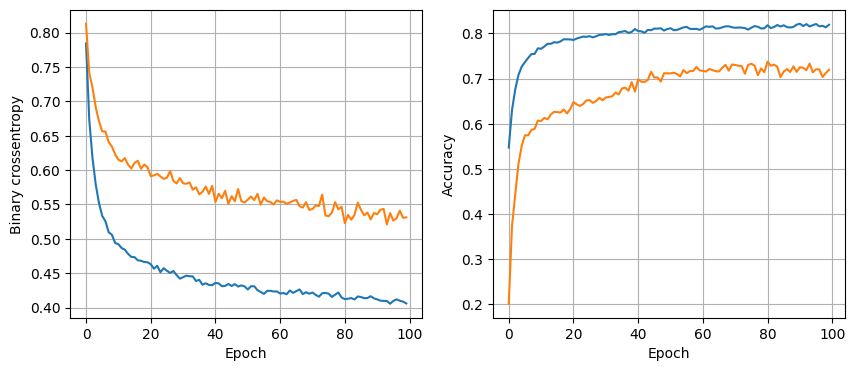

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.3798
Training with 16 nodes, dropout 0.5, lr 0.0005, batch size 128


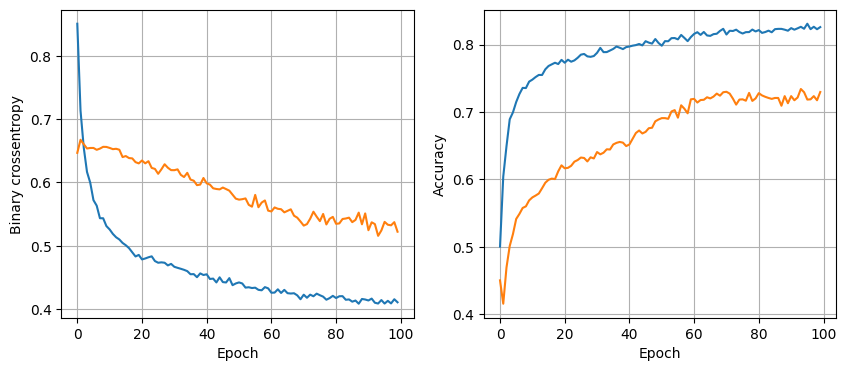

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.3755
Training with 32 nodes, dropout 0, lr 0.05, batch size 32


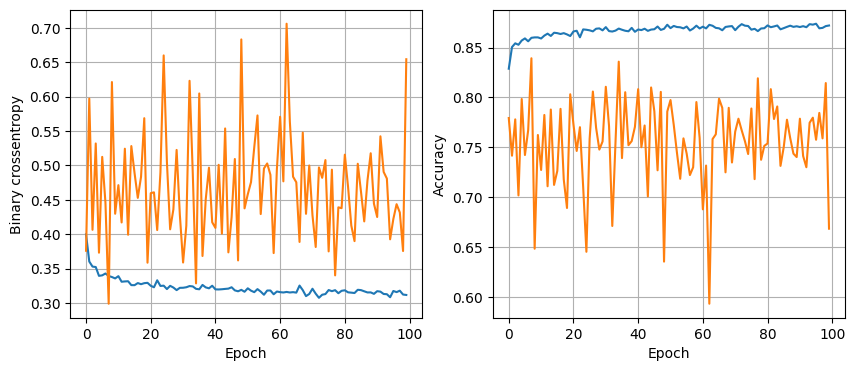

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8458 - loss: 0.3865
Training with 32 nodes, dropout 0, lr 0.05, batch size 64


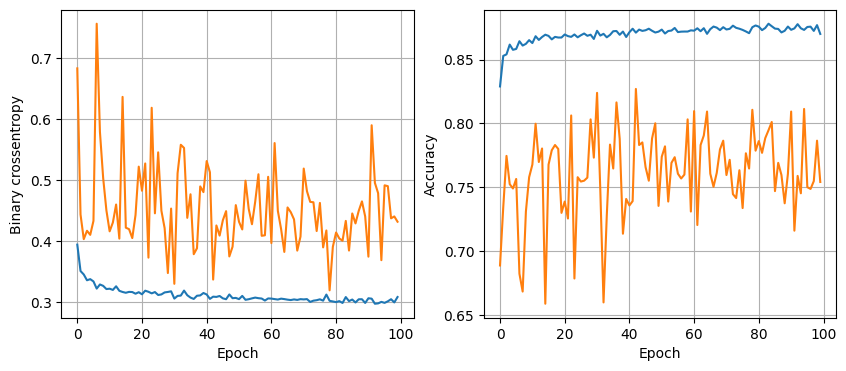

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8507 - loss: 0.3654
Training with 32 nodes, dropout 0, lr 0.05, batch size 128


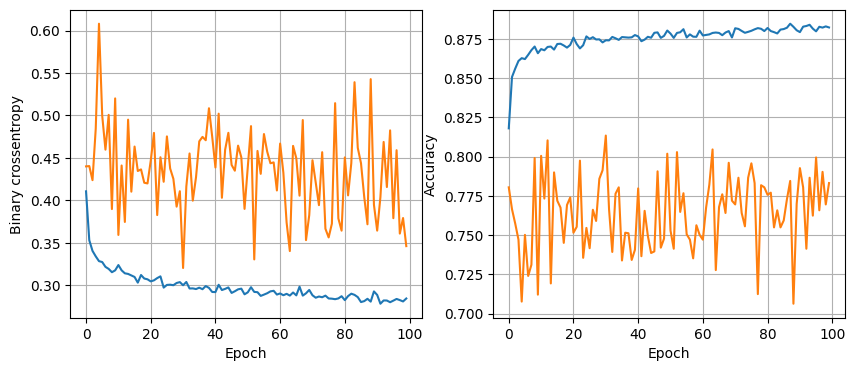

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3659
Training with 32 nodes, dropout 0, lr 0.005, batch size 32


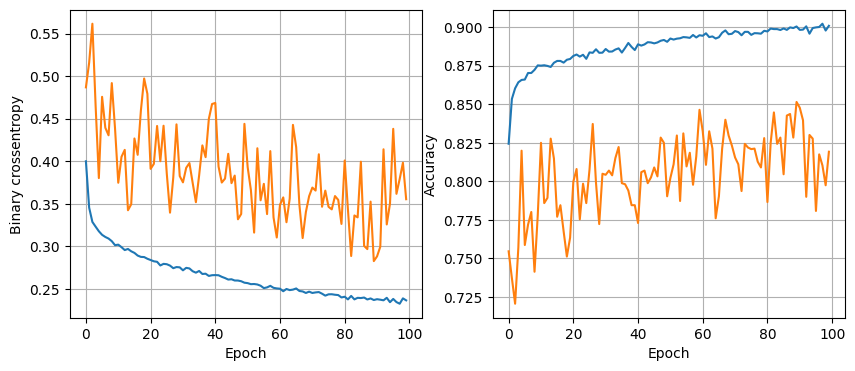

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.4039
Training with 32 nodes, dropout 0, lr 0.005, batch size 64


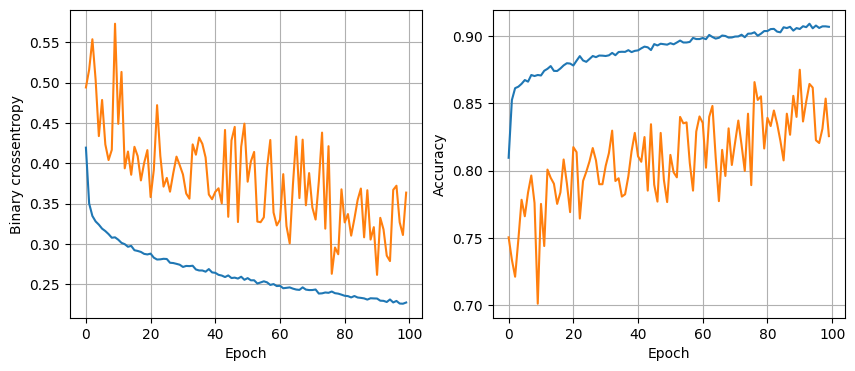

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.4029
Training with 32 nodes, dropout 0, lr 0.005, batch size 128


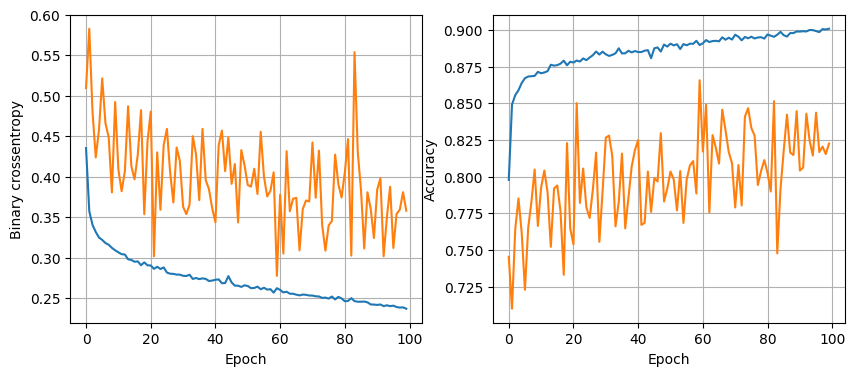

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3666
Training with 32 nodes, dropout 0, lr 0.0005, batch size 32


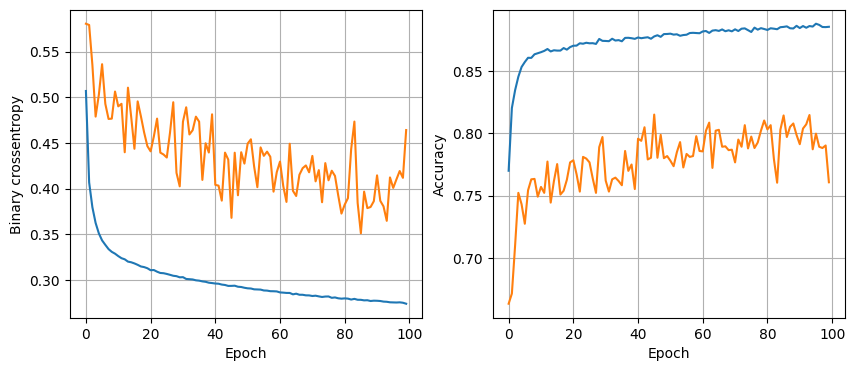

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3384
Training with 32 nodes, dropout 0, lr 0.0005, batch size 64


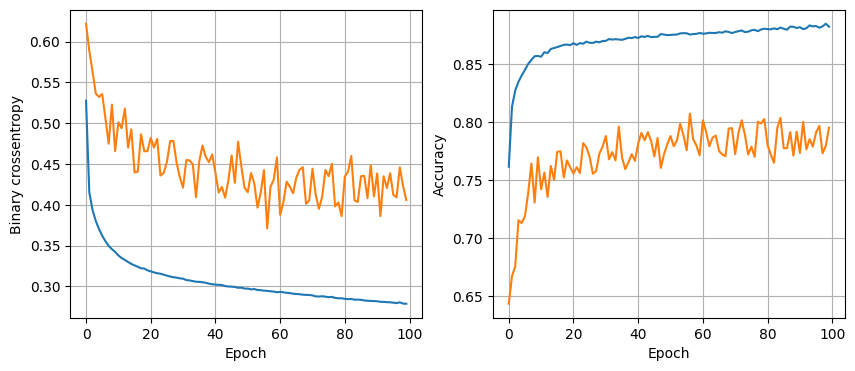

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3293
Training with 32 nodes, dropout 0, lr 0.0005, batch size 128


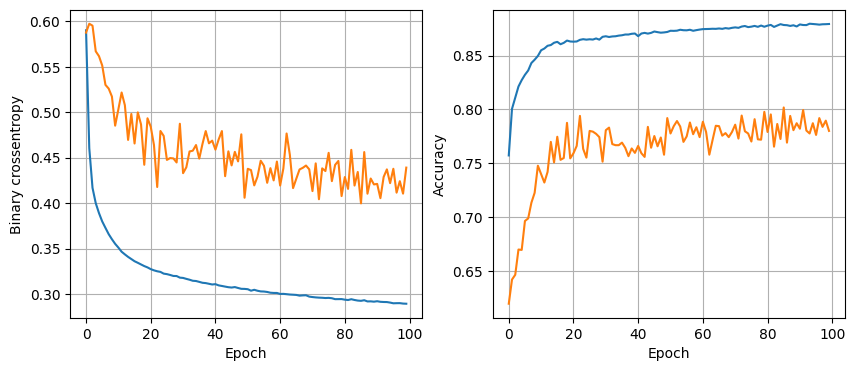

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3351
Training with 32 nodes, dropout 0.2, lr 0.05, batch size 32


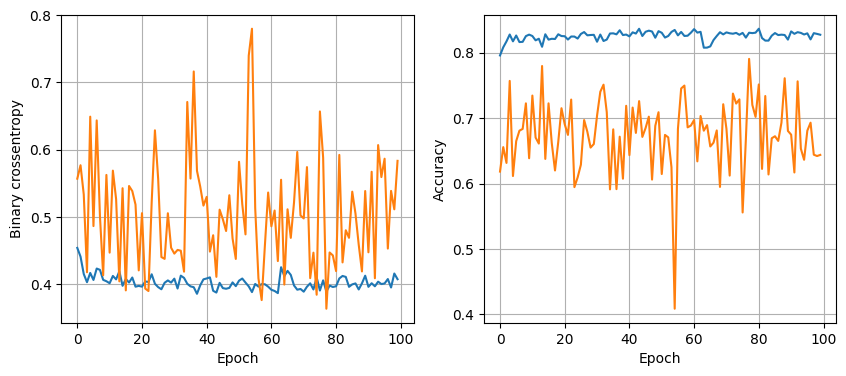

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.3610
Training with 32 nodes, dropout 0.2, lr 0.05, batch size 64


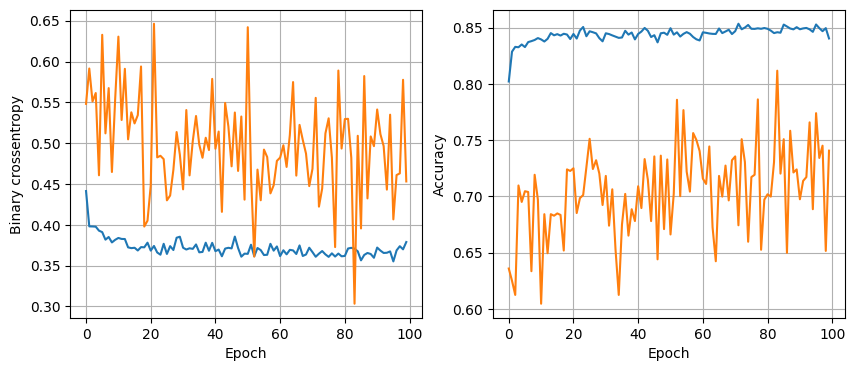

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3872
Training with 32 nodes, dropout 0.2, lr 0.05, batch size 128


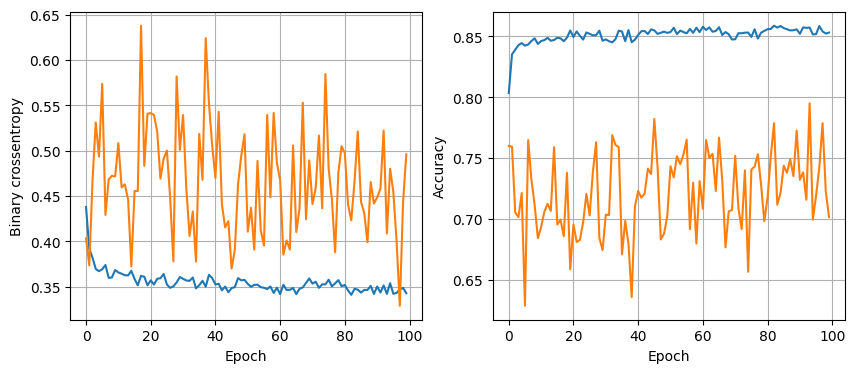

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3489
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 32


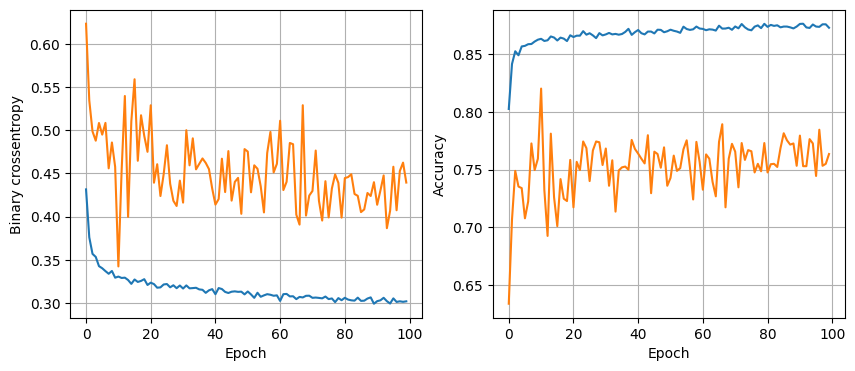

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3252
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 64


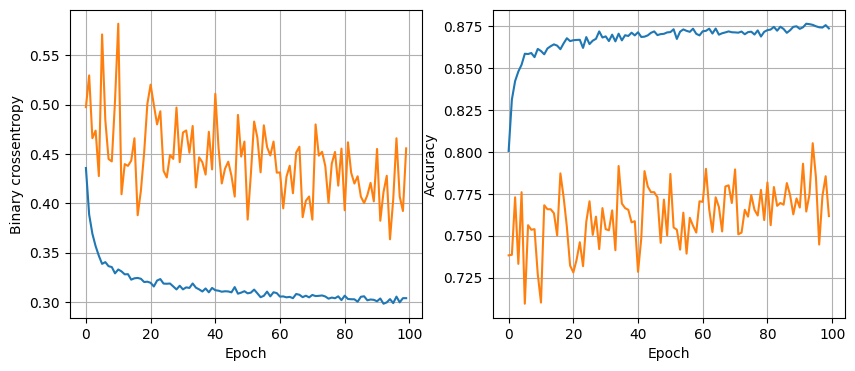

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3328
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 128


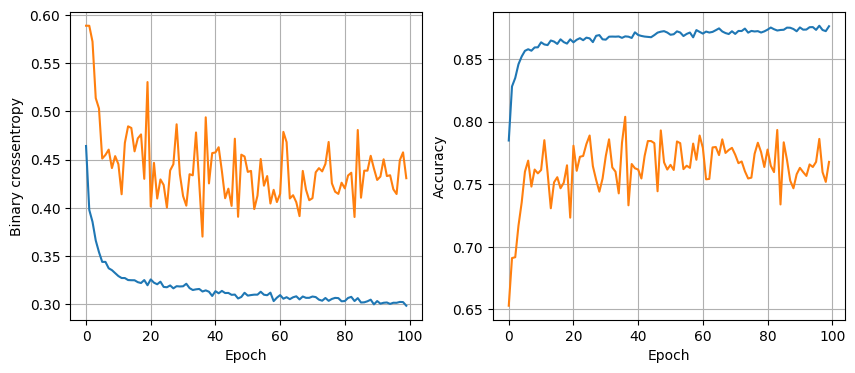

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3227
Training with 32 nodes, dropout 0.2, lr 0.0005, batch size 32


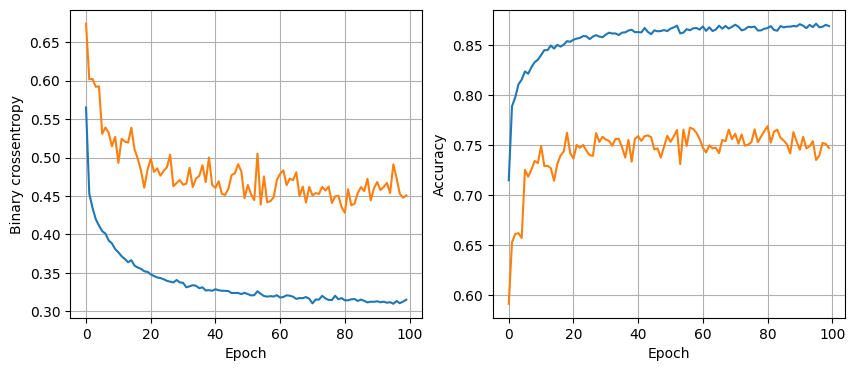

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3324
Training with 32 nodes, dropout 0.2, lr 0.0005, batch size 64


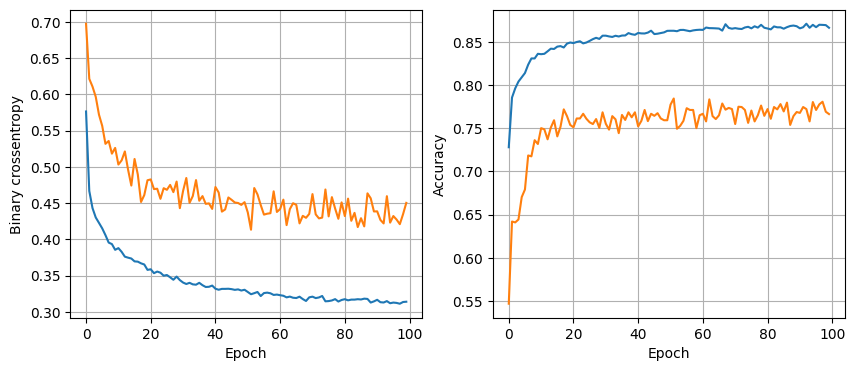

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3330
Training with 32 nodes, dropout 0.2, lr 0.0005, batch size 128


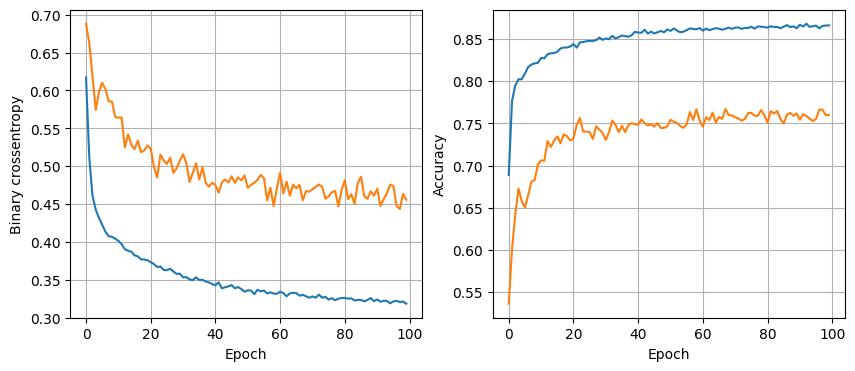

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3401
Training with 32 nodes, dropout 0.5, lr 0.05, batch size 32


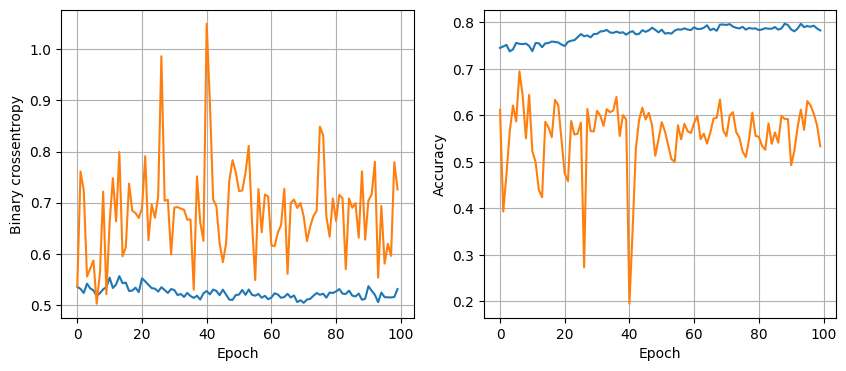

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4862
Training with 32 nodes, dropout 0.5, lr 0.05, batch size 64


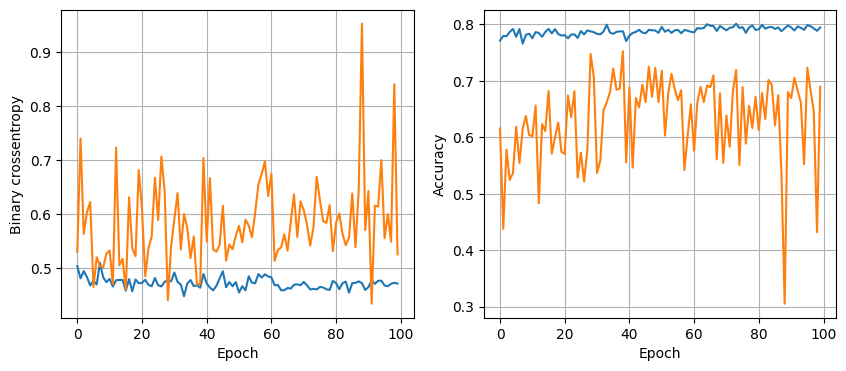

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.4266
Training with 32 nodes, dropout 0.5, lr 0.05, batch size 128


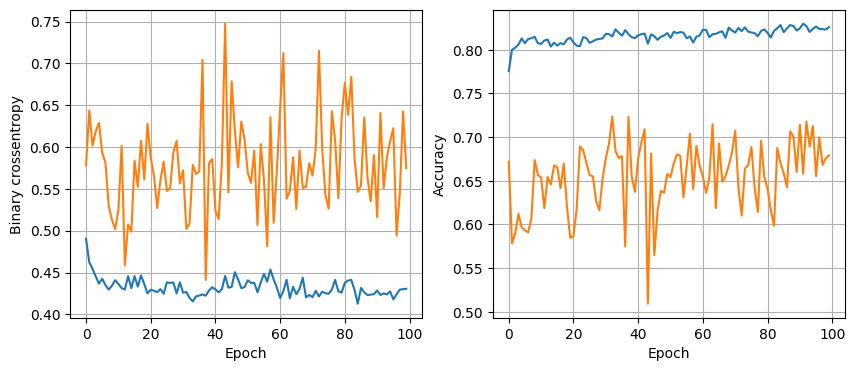

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.3995
Training with 32 nodes, dropout 0.5, lr 0.005, batch size 32


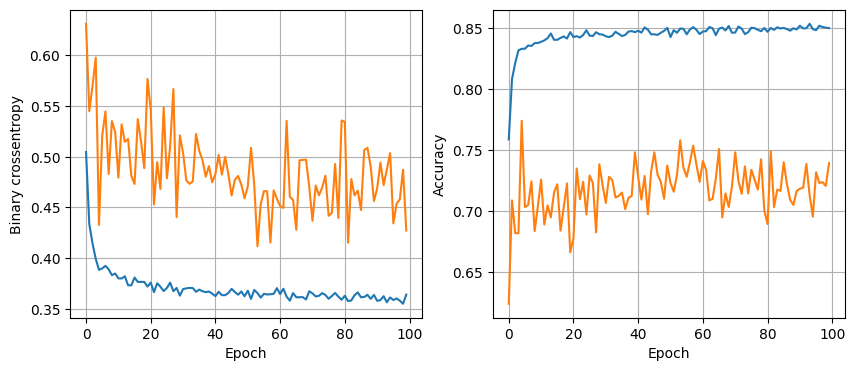

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.3507
Training with 32 nodes, dropout 0.5, lr 0.005, batch size 64


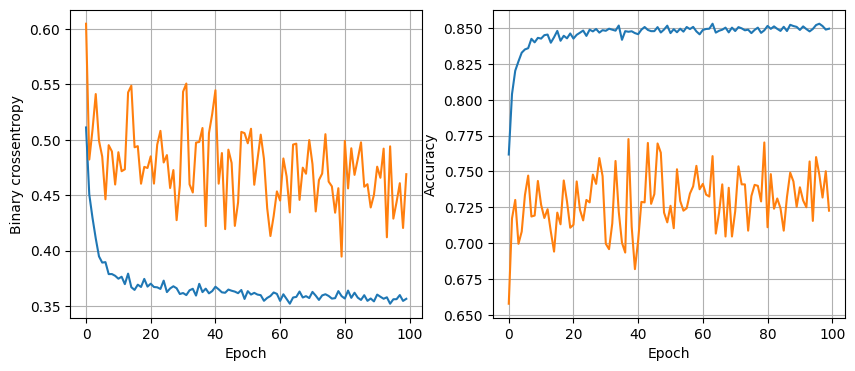

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.3503
Training with 32 nodes, dropout 0.5, lr 0.005, batch size 128


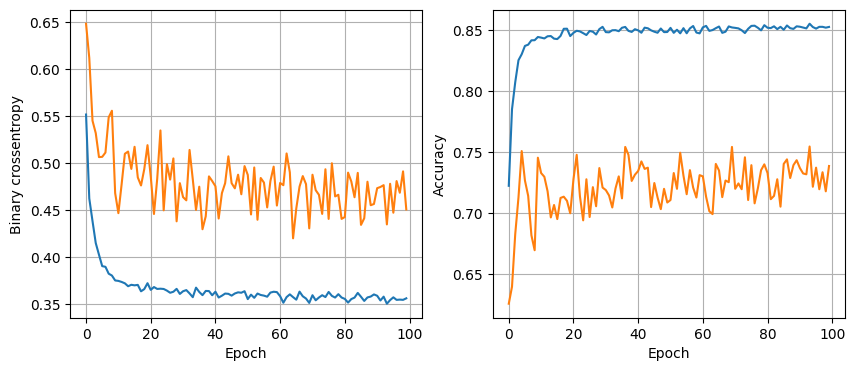

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3512
Training with 32 nodes, dropout 0.5, lr 0.0005, batch size 32


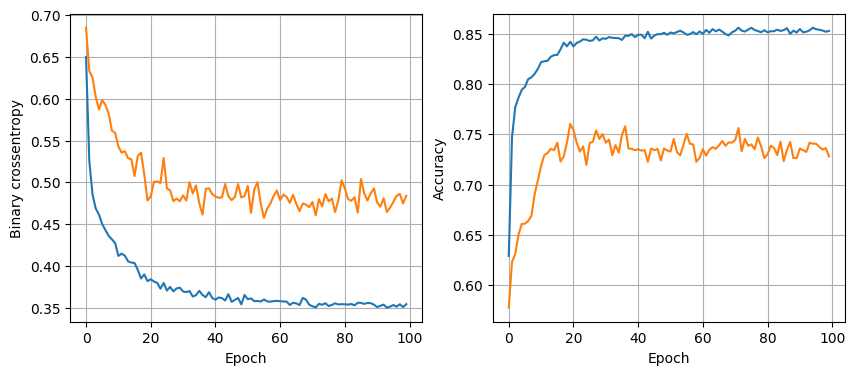

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3494
Training with 32 nodes, dropout 0.5, lr 0.0005, batch size 64


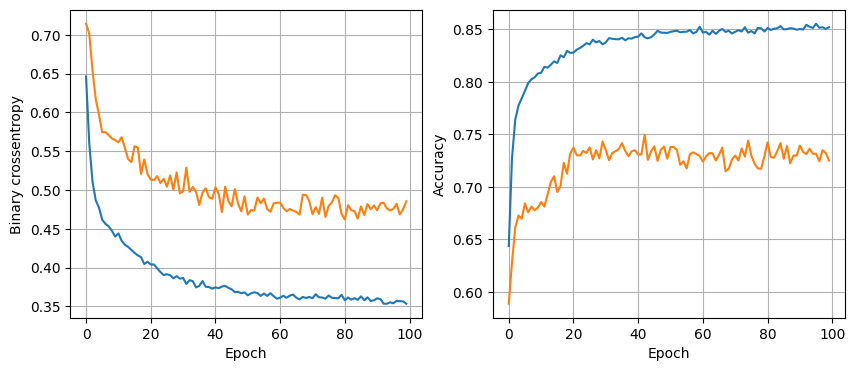

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3498
Training with 32 nodes, dropout 0.5, lr 0.0005, batch size 128


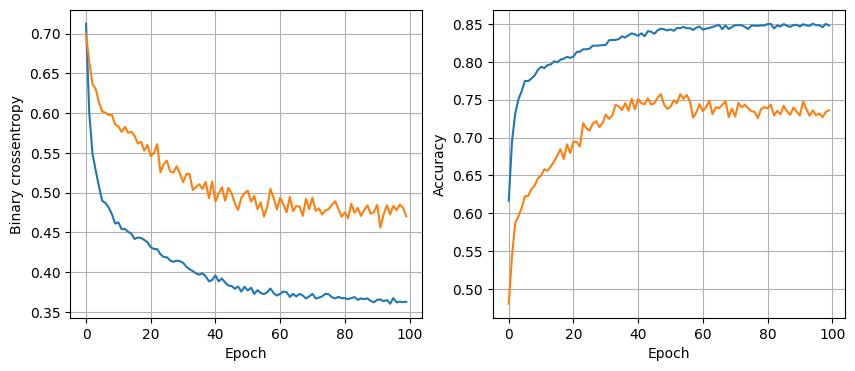

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3563
Training with 64 nodes, dropout 0, lr 0.05, batch size 32


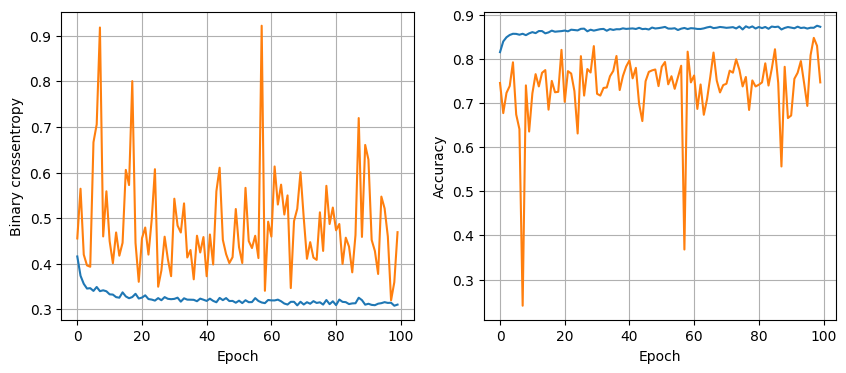

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.3548
Training with 64 nodes, dropout 0, lr 0.05, batch size 64


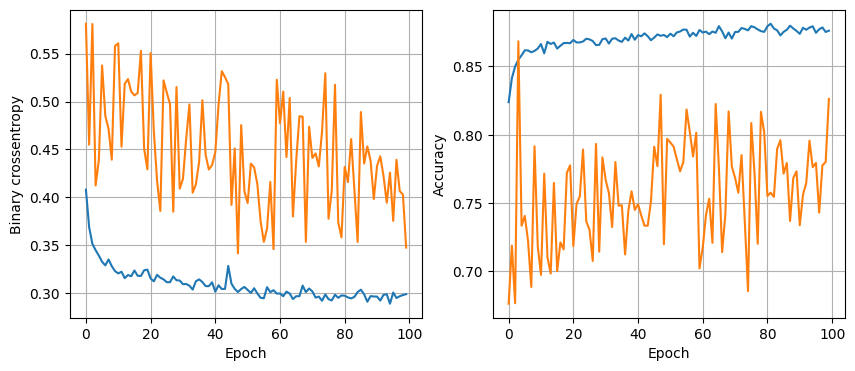

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.4072
Training with 64 nodes, dropout 0, lr 0.05, batch size 128


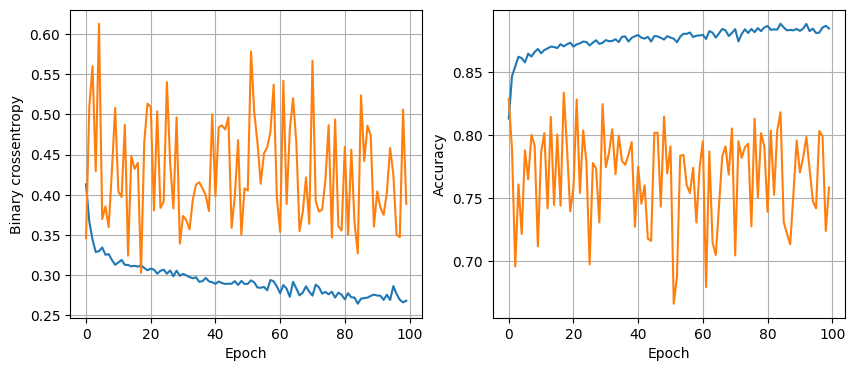

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3314
Training with 64 nodes, dropout 0, lr 0.005, batch size 32


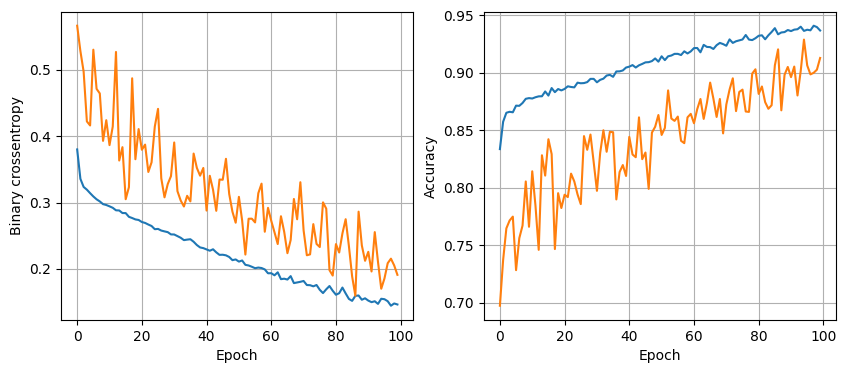

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.5678
Training with 64 nodes, dropout 0, lr 0.005, batch size 64


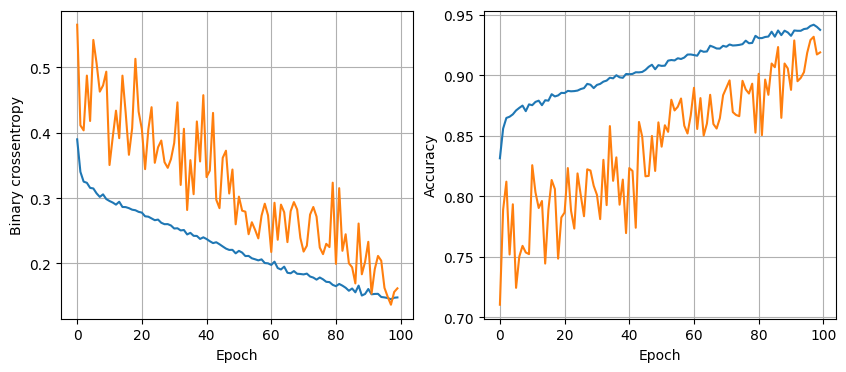

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.6172
Training with 64 nodes, dropout 0, lr 0.005, batch size 128


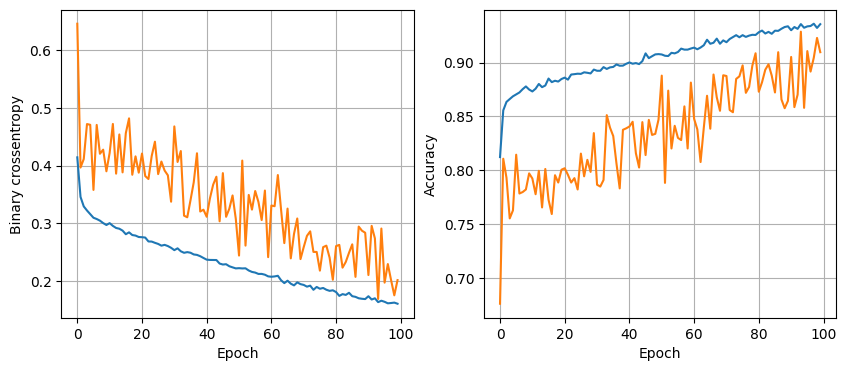

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.4729
Training with 64 nodes, dropout 0, lr 0.0005, batch size 32


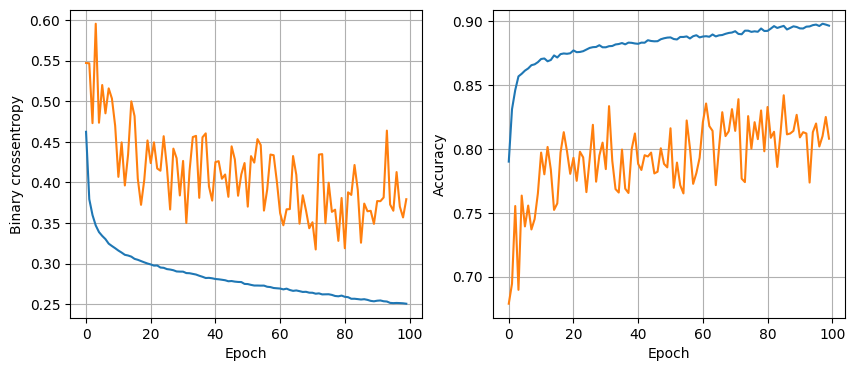

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3321
Training with 64 nodes, dropout 0, lr 0.0005, batch size 64


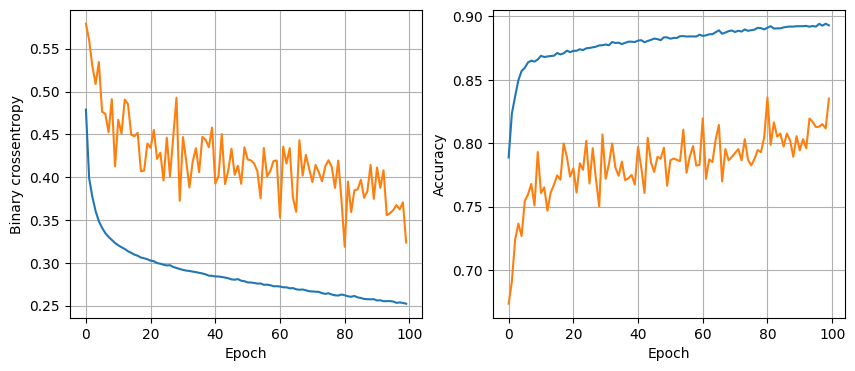

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3306
Training with 64 nodes, dropout 0, lr 0.0005, batch size 128


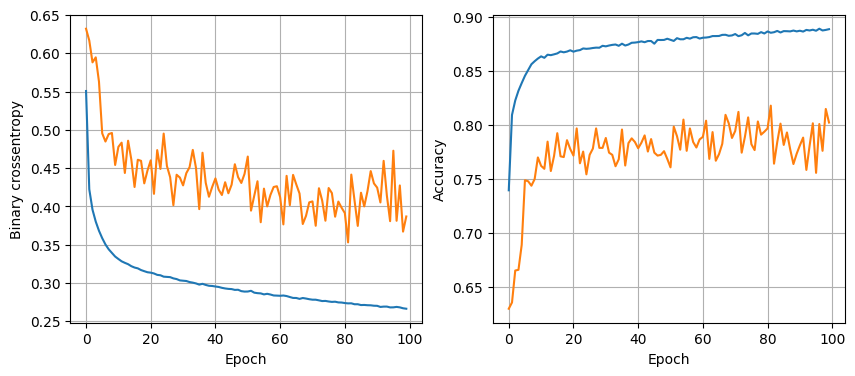

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3229
Training with 64 nodes, dropout 0.2, lr 0.05, batch size 32


KeyboardInterrupt: 

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2, 0.5]:
    for lr in [0.05, 0.005, 0.0005]:
      for batch_size in [32, 64, 128]:
        print(f"Training with {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)

        # Get the loss value (first element of the list)
        val_loss, _ = model.evaluate(x_valid, y_valid)

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1270
           1       0.88      0.95      0.91      2534

    accuracy                           0.88      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.88      0.88      3804

